Generate the term frequency (reference venue) from a set of paper information

In [1]:
# Extensions
%load_ext autoreload
%autoreload 2

In [9]:
# Imports
import scipy
import scipy.sparse    as sparse
import numpy           as np

from core.search.query_paper_mag import paper_mag_multiquery
from core.search.query_info      import paper_info_mag_check_multiquery
from core.utils.entity_type      import Entity_type

from inverse_paper_freq import InversePaperFreq
from plotting import *
from utils    import *

In [10]:
# Conf id
conf_id = 1127352206 #PLDI

# Generate papers for the conference
papers = paper_mag_multiquery(Entity_type.CONF, [conf_id])

print("Papers for conference:", len(papers))

# Import paper information here!
paper_informations = paper_info_mag_check_multiquery(papers)

return statue: 403
{'Ocp-Apim-Subscription-Key': '004967a3daac4bf683e16ca2a459de07'}
ERROR: problem with the request.
b'\n{ "error": { "code": "QuotaExceeded", "message": "Out of call volume quota. Quota will be replenished later." } }\n\t\t        \t\t\t\t  '
return statue: 403
{'Ocp-Apim-Subscription-Key': 'ce7734c51f504dcaa1dd89cb88fa153d'}
ERROR: problem with the request.
b'\n{ "error": { "code": "QuotaExceeded", "message": "Out of call volume quota. Quota will be replenished later." } }\n\t\t        \t\t\t\t  '
return statue: 403
{'Ocp-Apim-Subscription-Key': '9c0c0c5e7758484b9ed8092034eac796'}
ERROR: problem with the request.
b'\n{ "error": { "code": "QuotaExceeded", "message": "Out of call volume quota. Quota will be replenished later." } }\n\t\t        \t\t\t\t  '
return statue: 403
{'Ocp-Apim-Subscription-Key': 'aeea5a7bb8fd4d62af6c9c08b26521dc'}
ERROR: problem with the request.
b'\n{ "error": { "code": "QuotaExceeded", "message": "Out of call volume quota. Quota will be reple

In [118]:
pid2title = dict()
for paper_info in paper_informations:
    pid2title[paper_info['PaperId']] = paper_info['PaperTitle']

In [92]:
ipf = InversePaperFreq()
ipf.fit(paper_informations)

In [93]:
print(ipf.emb_matrix.toarray())
print(ipf.obj_dim, ipf.emb_dim)
print(np.sum(ipf.emb_matrix.toarray()))

[[1.2290168  0.43116733 2.12958169 ... 0.         0.         0.        ]
 [2.4580336  0.43116733 4.25916338 ... 0.         0.         0.        ]
 [0.         0.646751   0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         7.07834158]
 [1.2290168  0.         2.12958169 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
1186 1024
58518.70802451289


In [94]:
title1 = 'memsat checking axiomatic specifications of memory models'
title2 = 'mechanized verification of fine grained concurrent programs'

In [95]:
ipf.title_to_vec(title1)

array([0.        , 0.21558367, 2.12958169, ..., 0.        , 0.        ,
       0.        ])

In [96]:
ipf.sim_titles(title1, title2)

0.12055662410168762

In [97]:
ipf.most_sim(ipf.title_to_vec(title1))

[{'idx': 371,
  'obj': 'memsat checking axiomatic specifications of memory models',
  'sim': 1.0000000000000002},
 {'idx': 875,
  'obj': 'synthesizing memory models from framework sketches and litmus tests',
  'sim': 0.45326630568177007},
 {'idx': 126,
  'obj': 'synthesizing software verifiers from proof rules',
  'sim': 0.4530320133797805},
 {'idx': 825,
  'obj': 'automatically learning shape specifications',
  'sim': 0.4330534550777462},
 {'idx': 467,
  'obj': 'herding cats modelling simulation testing and data mining for weak memory',
  'sim': 0.4269199228026107}]

In [98]:
ipf.most_sim(ipf.title_to_vec(title2))

[{'idx': 501,
  'obj': 'mechanized verification of fine grained concurrent programs',
  'sim': 0.9999999999999998},
 {'idx': 987,
  'obj': 'atomicity refinement for verified compilation',
  'sim': 0.5745445010435906},
 {'idx': 914,
  'obj': 'rely guarantee references for refinement types over aliased mutable data',
  'sim': 0.5484855641831642},
 {'idx': 250,
  'obj': 'certifying low level programs with hardware interrupts and preemptive threads',
  'sim': 0.48802156094536053},
 {'idx': 1024,
  'obj': 'bounded expectations resource analysis for probabilistic programs',
  'sim': 0.46927721607558887}]

In [101]:
#auth_vec = ipf.author_to_vec('james bornholt')
auth_vec = ipf.author_to_vec('stephen m blackburn')
print(auth_vec)
print(auth_vec.reshape((1024,)))
print(auth_vec.shape)
print(auth_vec.sum())

[4.9160672  3.44933866 2.12958169 ... 0.         0.         0.        ]
[4.9160672  3.44933866 2.12958169 ... 0.         0.         0.        ]
(1024,)
176.2786616437626


In [103]:
for res in ipf.most_sim(auth_vec):
    print('sim:', res['sim'], ', obj:', res['obj'][:80])

sim: 0.9430872197323734 , obj: immix a mark region garbage collector with space efficiency fast collection and 
sim: 0.9240109641260791 , obj: z rays divide arrays and conquer speed and flexibility
sim: 0.9044052161606736 , obj: free me a static analysis for automatic individual object reclamation
sim: 0.8928062910200526 , obj: beltway getting around garbage collection gridlock
sim: 0.8716041151264146 , obj: garbage collection without paging


In [104]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler

In [105]:
scaler = StandardScaler(with_mean=False)
scaler = scaler.fit(ipf.emb_matrix)

pca = TruncatedSVD(n_components=2)
pca.fit(scaler.transform(ipf.emb_matrix))

author_names = ['stephen m blackburn', 'kathryn s mckinley',
                'james bornholt', 'julian dolby', 'mandana vaziri',
                'perry cheng']

In [106]:
auth_vecs   = ipf.authors_to_vec(author_names)
auth_matrix = np.zeros((len(auth_vecs), ipf.emb_dim))
auth_list   = list()
vec_list    = list()
for i, a_vec in enumerate(auth_vecs.items()):
    auth, vec = a_vec
    auth_list.append(auth)
    vec_list.append(vec)
    auth_matrix[i] = vec

auth_pca_matrix = pca.transform(scaler.transform(auth_matrix))

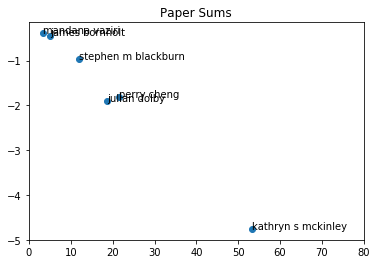

In [107]:
x = auth_pca_matrix[:,0]
y = auth_pca_matrix[:,1]

fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_xlim([0, 80])
ax.set_title('Paper Sums')
for i, name in enumerate(auth_list):
    ax.annotate(name, (x[i], y[i]))

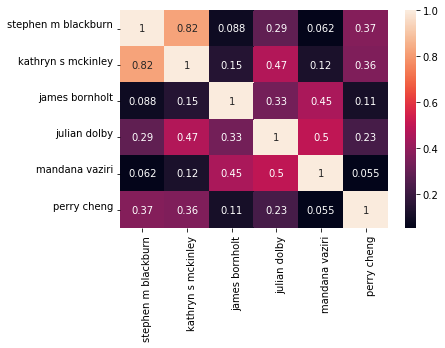

In [108]:
sim_matrix = gen_cmp_matrix(vec_list)

cmp_plot(sim_matrix, auth_list, plt)

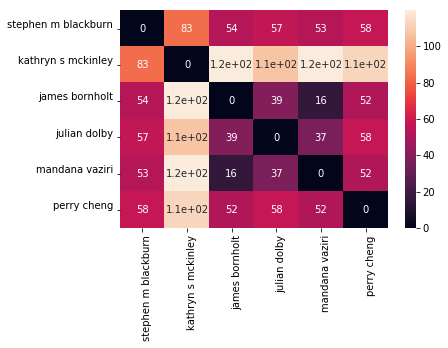

In [109]:
dist_matrix = gen_cmp_matrix(vec_list, calc=lambda x,y: np.linalg.norm(x-y))

cmp_plot(dist_matrix, auth_list, plt)

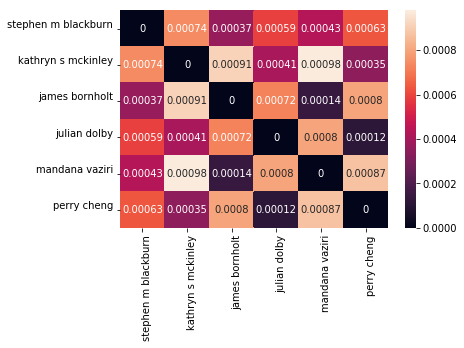

In [110]:
emd = lambda x, y: scipy.stats.wasserstein_distance(x/x.sum(), y/y.sum())
#emd_matrix = gen_cmp_matrix(vec_list, calc=scipy.stats.wasserstein_distance)
emd_matrix = gen_cmp_matrix(vec_list, calc=emd)

cmp_plot(emd_matrix, auth_list, plt)

In [111]:
auth_vecs   = ipf.authors_to_vec(author_names, scoring='avg')
auth_matrix = np.zeros((len(auth_vecs), ipf.emb_dim))
auth_list   = list()
vec_list    = list()
for i, a_vec in enumerate(auth_vecs.items()):
    auth, vec = a_vec
    auth_list.append(auth)
    vec_list.append(vec)
    auth_matrix[i] = vec

auth_pca_matrix = pca.transform(scaler.transform(auth_matrix))

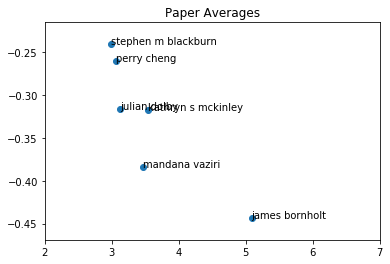

In [112]:
x = auth_pca_matrix[:,0]
y = auth_pca_matrix[:,1]

fig, ax = plt.subplots()
ax.scatter(x, y)
ax.set_title('Paper Averages')
ax.set_xlim([2, 7])
for i, name in enumerate(auth_list):
    ax.annotate(name, (x[i], y[i]))

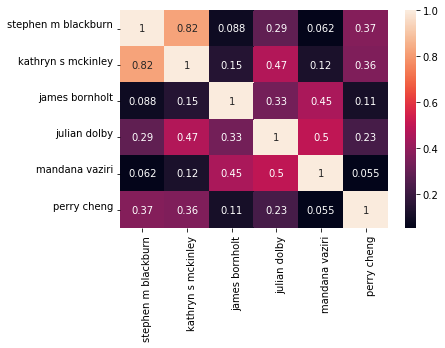

In [113]:
sim_matrix = gen_cmp_matrix(vec_list)

cmp_plot(sim_matrix, auth_list, plt)

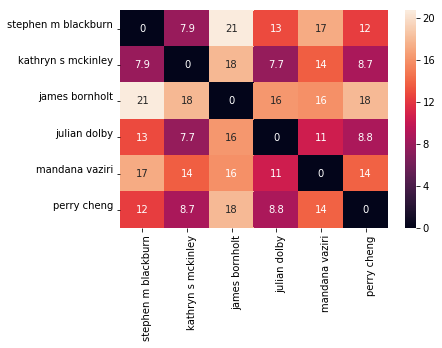

In [114]:
dist_matrix = gen_cmp_matrix(vec_list, calc=lambda x,y: np.linalg.norm(x-y))

cmp_plot(dist_matrix, auth_list, plt)

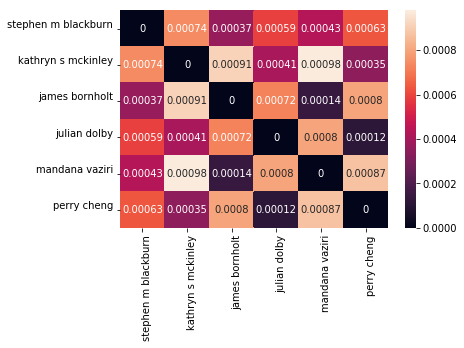

In [115]:
emd = lambda x, y: scipy.stats.wasserstein_distance(x/x.sum(), y/y.sum())
emd_matrix = gen_cmp_matrix(vec_list, calc=scipy.stats.wasserstein_distance)
emd_matrix = gen_cmp_matrix(vec_list, calc=emd)

cmp_plot(emd_matrix, auth_list, plt)

In [116]:
from research.data.gen_session_grouping import gen_sessions

sessions = gen_sessions()

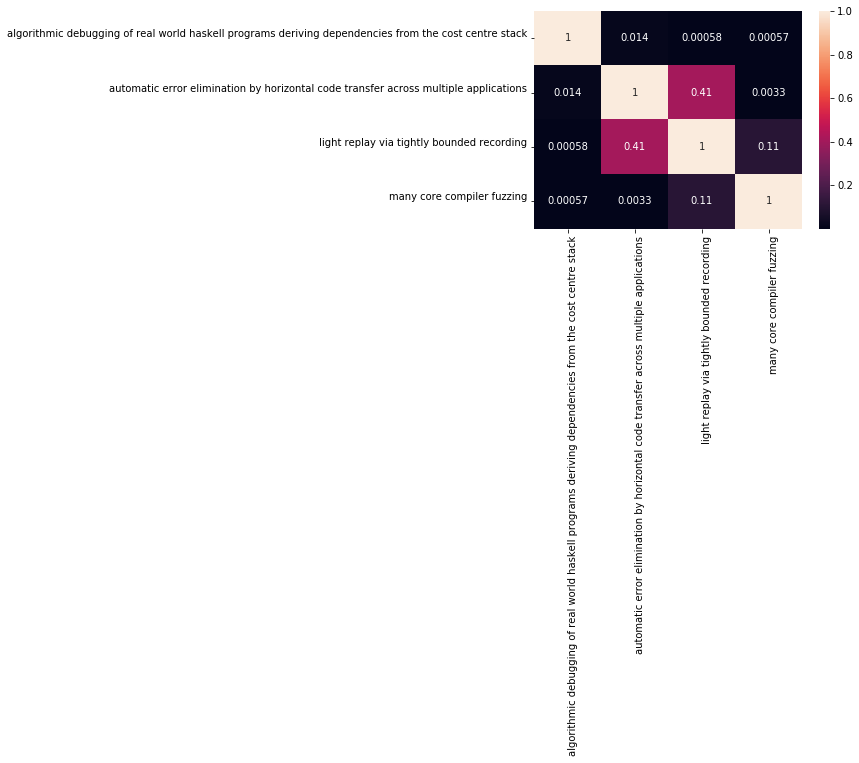

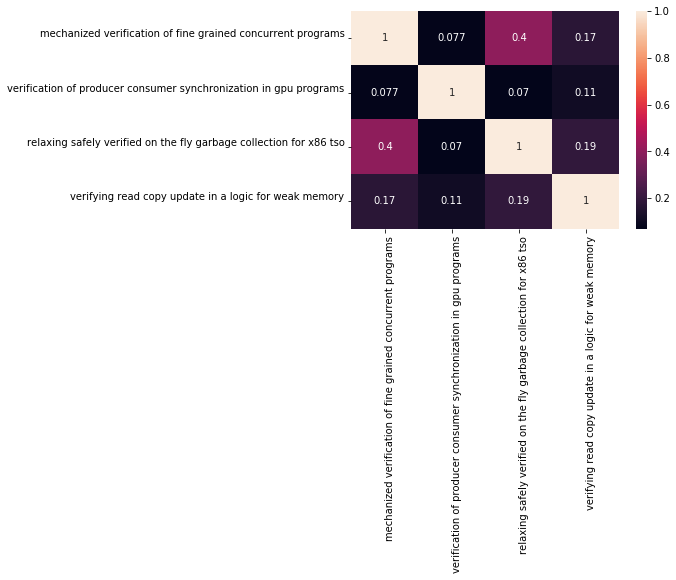

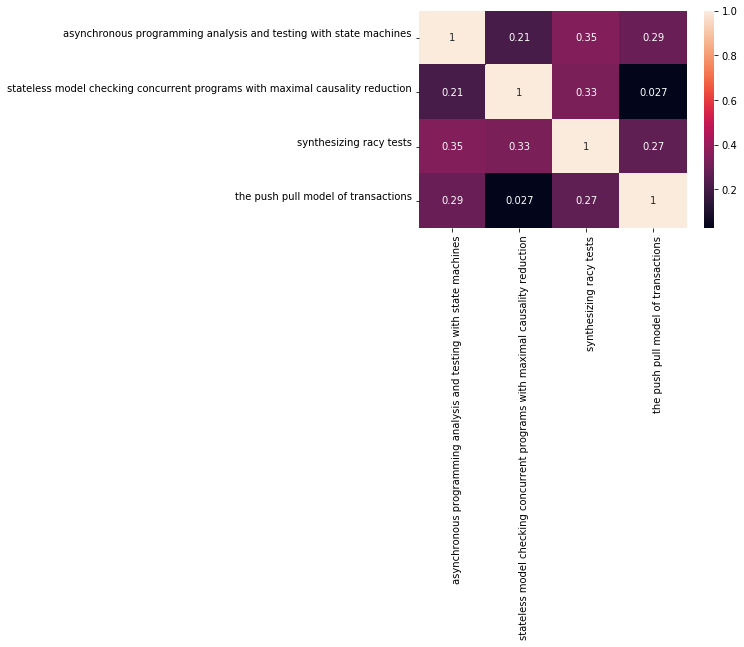

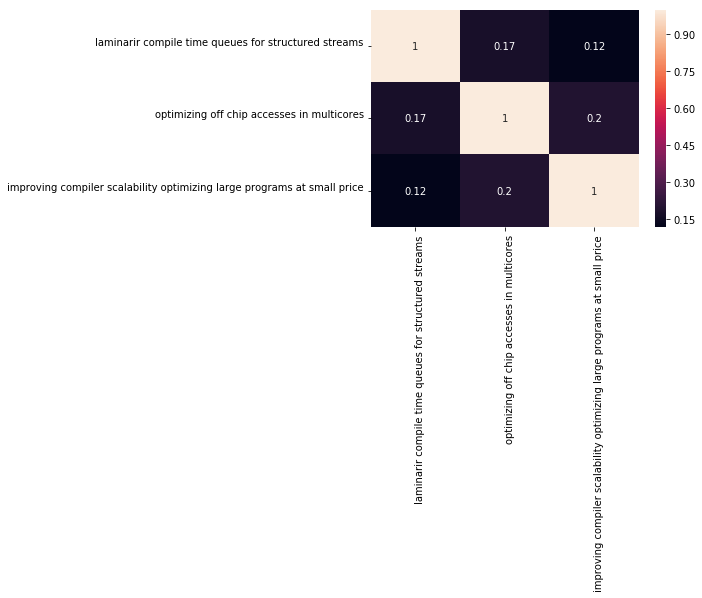

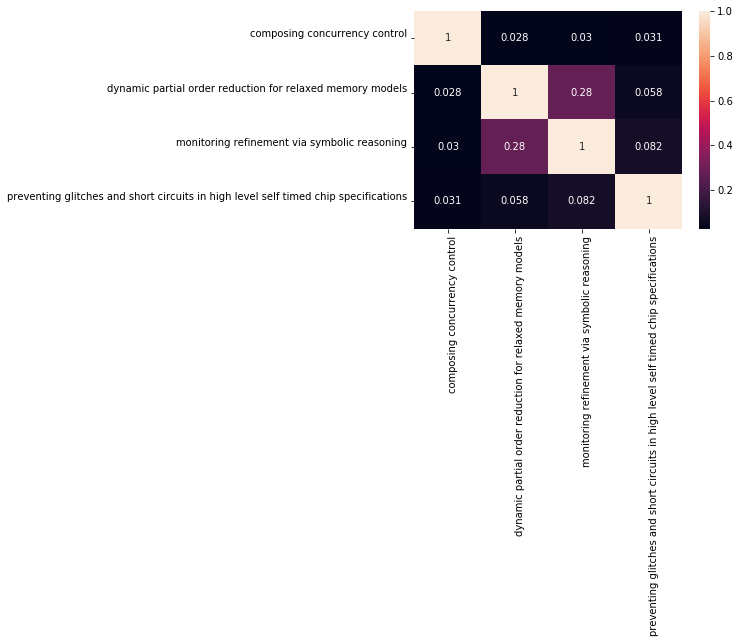

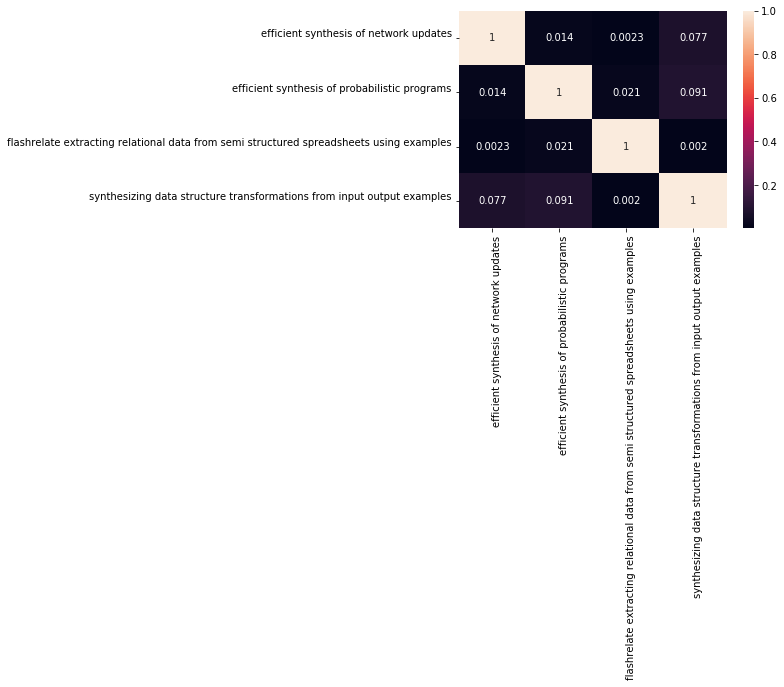

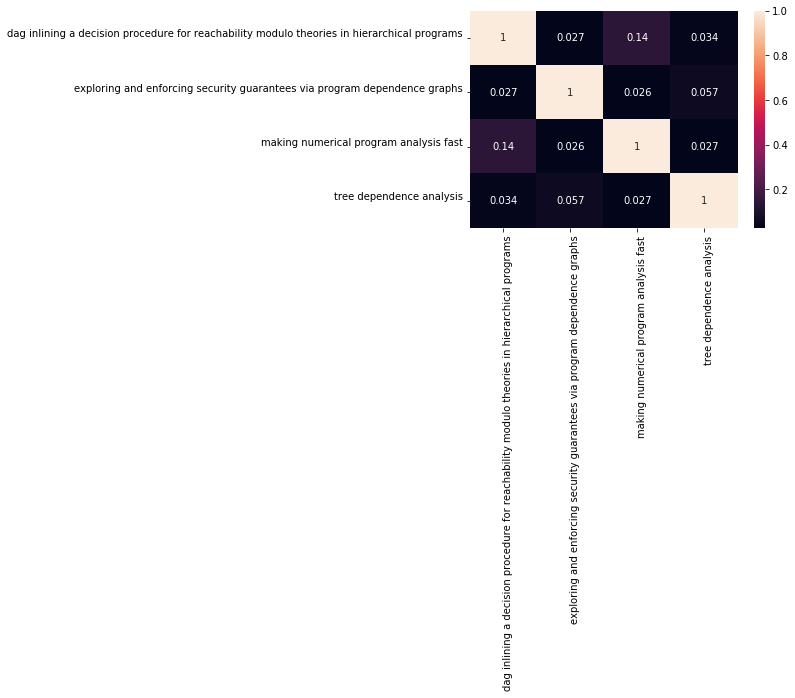

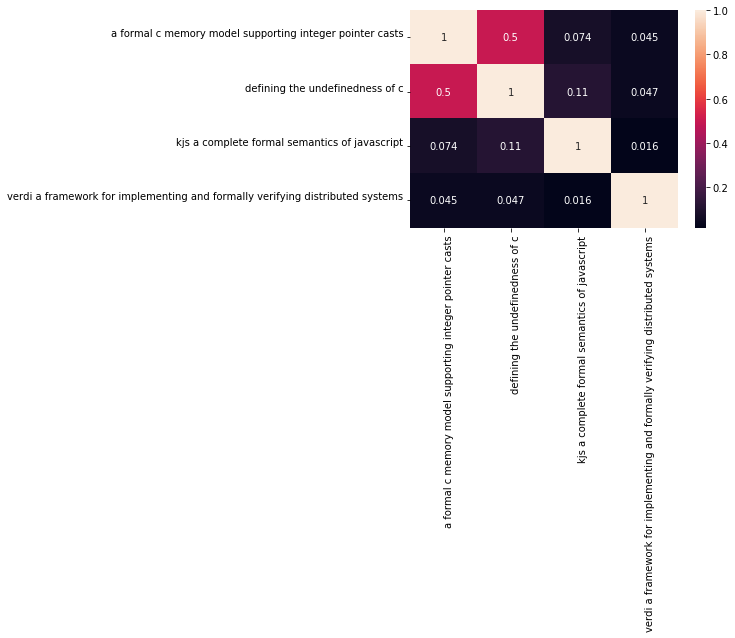

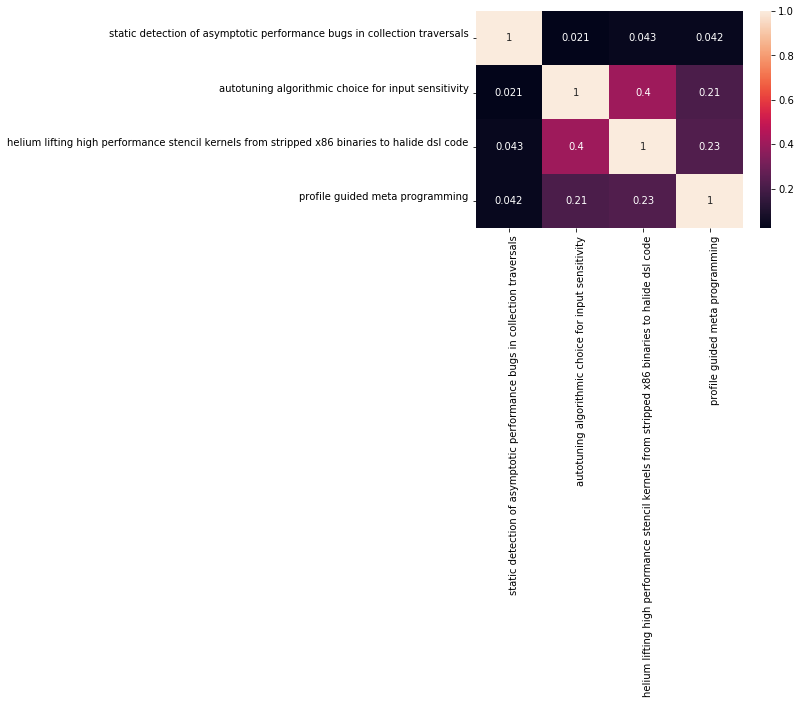

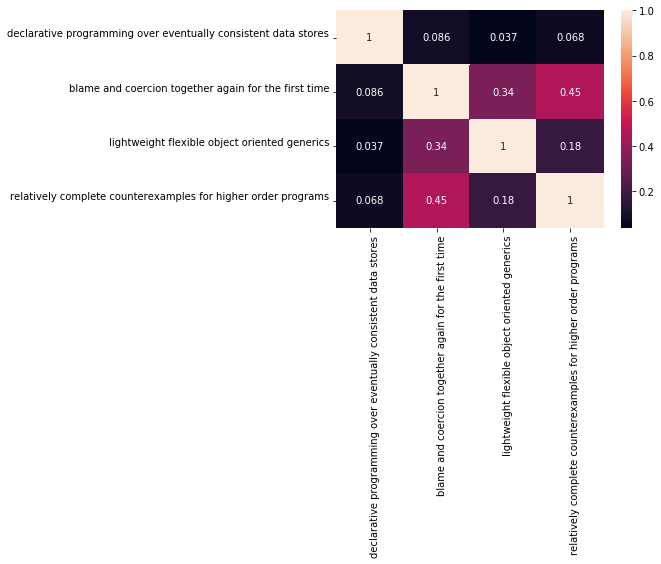

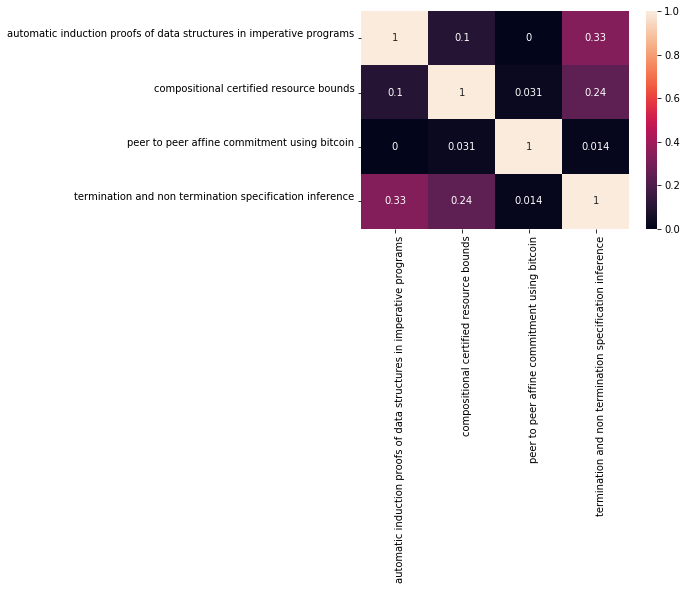

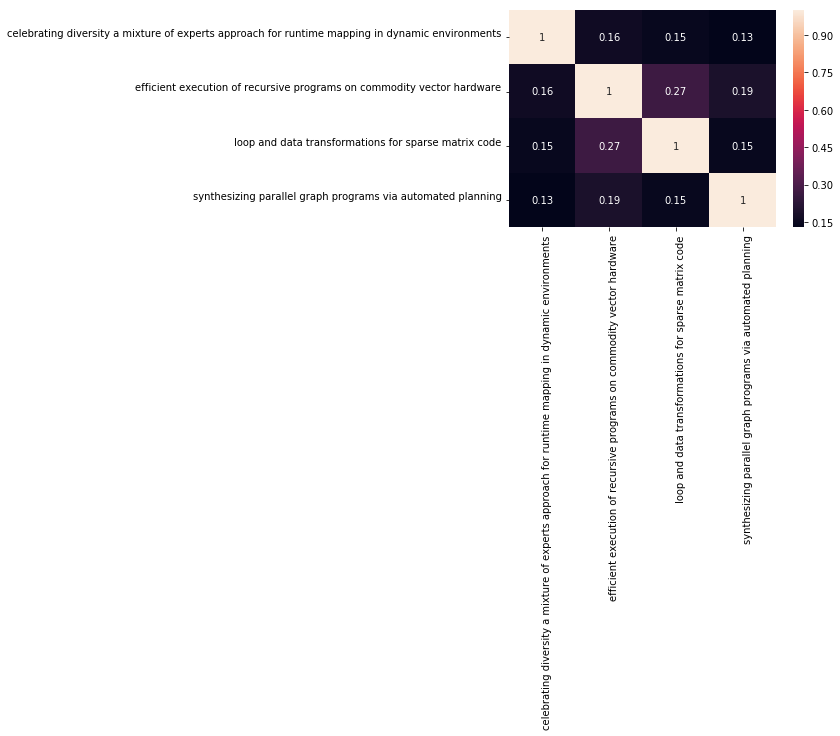

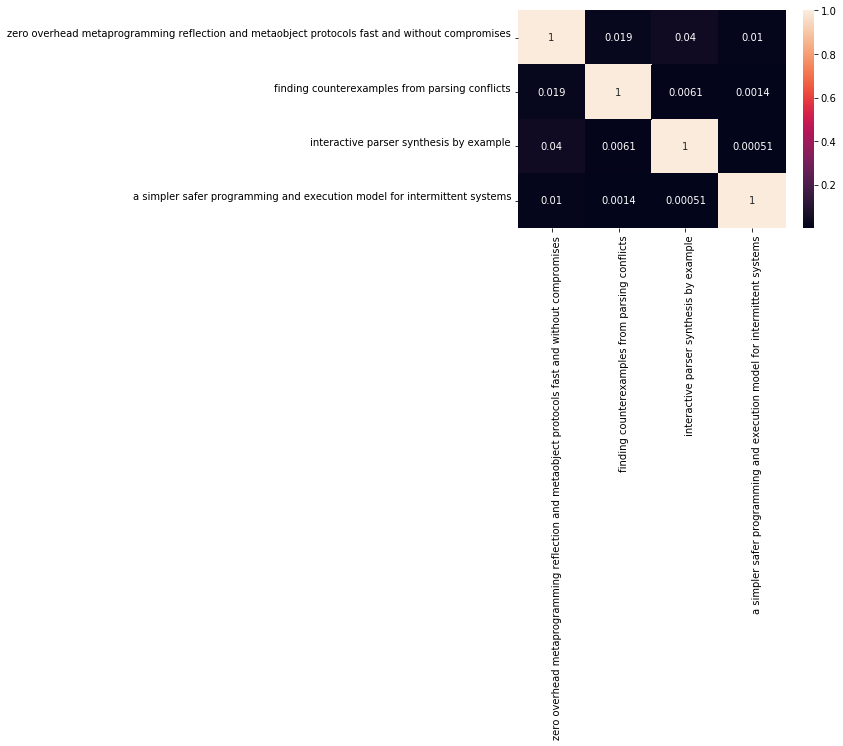

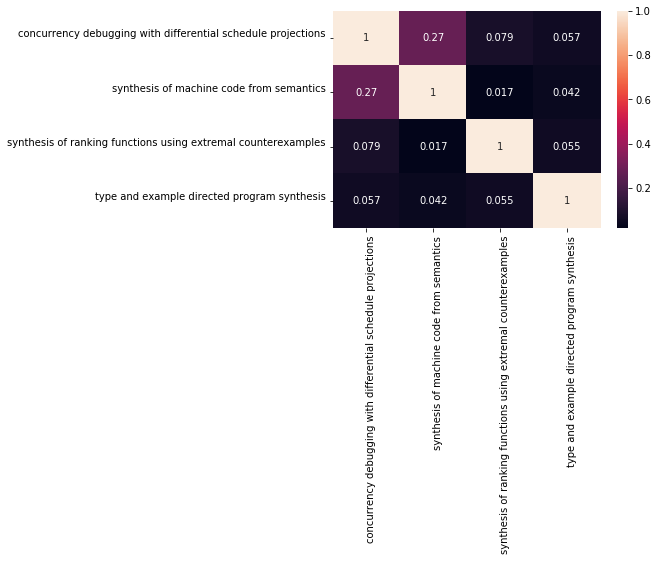

In [121]:
for j, session in enumerate(sessions):
    s_auth_list = [pid2title[int(s)] for s in session]
    auth_vecs   = ipf.titles_to_vec(s_auth_list)
    auth_list   = list()
    vec_list    = list()
    for i, a_vec in enumerate(auth_vecs.items()):
        auth, vec = a_vec
        auth_list.append(auth)
        vec_list.append(vec)
    
    sim_matrix = gen_cmp_matrix(vec_list)

    cmp_plot(sim_matrix, auth_list, plt)
    plt.show()